<a href="https://colab.research.google.com/github/lnpetrova/comp_ling/blob/master/ML_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image

In [0]:
import tarfile
import os
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

In [4]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-24 21:24:02--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.9MB/s    in 5.3s    

2020-02-24 21:24:08 (15.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
tarfile.open('/content/aclImdb_v1.tar.gz', 'r').extractall()

In [0]:
path_test_neg = '/content/aclImdb/test/neg'
path_test_pos = '/content/aclImdb/test/pos'
path_train_neg = '/content/aclImdb/train/neg'
path_train_pos = '/content/aclImdb/train/pos'

In [0]:
find_test_neg = os.walk(path_test_neg)
tests_neg = list(find_test_neg)[0][-1]
#print(tests_neg)

find_test_pos = os.walk(path_test_pos)
tests_pos = list(find_test_pos)[0][-1]

find_train_neg = os.walk(path_train_neg)
trains_neg = list(find_train_neg)[0][-1]

find_train_pos = os.walk(path_train_pos)
trains_pos = list(find_train_pos)[0][-1]

In [0]:
# pathes = []
# pathes.append(path_test_neg)
# pathes.append(path_test_pos)
# pathes.append(path_train_pos)
# pathes.append(path_train_neg)

In [0]:
# def get_files(path):
#   find_files = os.walk(path)
#   list_of_files = list(find_files)[0][-1]
#   return list_of_files

In [0]:
# for path in pathes:
#   get_files(path)

In [0]:
def collect_texts(path, files):
    texts = [open('{}/{}'.format(path, file)).read().lower() for file in files]
    return texts

In [12]:
test_pos_df = pd.DataFrame(collect_texts(path_test_pos, tests_pos),  columns = ['text'])
test_pos_df['polarity'] = 1
test_pos_df.head()

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1


In [13]:
test_neg_df = pd.DataFrame(collect_texts(path_test_neg, tests_neg),  columns = ['text'])
test_neg_df['polarity'] = 0
test_neg_df.head()

,text,polarity
0,this movie was an absolute waste of time. it's...,0
1,some spoilers**** a soap has some wonderful mo...,0
2,i'm not sure what the director and editor were...,0
3,"yes, thats that i felt after i completed watch...",0
4,"first off, i am critical of this movie because...",0


In [14]:
test = pd.concat((test_pos_df, test_neg_df))
test

,text,polarity
0,even an old cynical doctor who fan like myself...,1
1,i just had the opportunity to see 'nuovomondo'...,1
2,"i watched love life on holiday, when it was fi...",1
3,if you love drive-in cheeze from the early '70...,1
4,what a trip down memory lane.<br /><br />do no...,1
...,...,...
12495,i can't believe i even tried to watch this fil...,0
12496,what is wrong with curacao ( also known as dea...,0
12497,"inane, awful farce basically about a young man...",0
12498,when i first saw this show i thought to my sel...,0


In [15]:
train_pos_df = pd.DataFrame(collect_texts(path_train_pos, trains_pos),  columns = ['text'])
train_pos_df['polarity'] = 1
train_pos_df.head()

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1


In [16]:
train_neg_df = pd.DataFrame(collect_texts(path_train_neg, trains_neg),  columns = ['text'])
train_neg_df['polarity'] = 0
train_neg_df.head()

,text,polarity
0,this movie is really goofy! i saw it as an 11 ...,0
1,basically this is about a couple who want to a...,0
2,"hmm i agree with the reviewer who said that ""...",0
3,'the omen 4: the awakening' is a made-for-tele...,0
4,bugs bunny accidentally ends up at the south p...,0


In [17]:
train = pd.concat((train_pos_df, train_neg_df))
train

,text,polarity
0,i first saw ice age in the subiaco cinemas whe...,1
1,what can i say ? an action and allegorical tal...,1
2,reviewed at the world premiere screening sept....,1
3,"i may be biased, i am the author of the novel ...",1
4,"what a strangely wonderful, if sometimes sligh...",1
...,...,...
12495,i was shocked by the ridiculously unbelievable...,0
12496,this movie is just plain bad. it isn't even wo...,0
12497,aka: mondays in the sun<br /><br />i have no i...,0
12498,"after eagerly waiting to the end, i have to sa...",0


In [62]:
train = shuffle(train, random_state=42)
train = train[:10000]
train.head()

,text,polarity
4977,"ok, let me again admit that i haven't seen any...",0
1979,st. elmo's fire has no bearing on life after u...,0
4547,really the tale of two cocky brothers and thei...,1
6246,"the honey, i shrunk the kids franchise was a h...",0
8993,i went to see this movie expecting a nice rela...,1


In [71]:
x_train = vectorizer.fit_transform(train.text)
print(x_train)
y_train = train.polarity
print(y_train)

  (0, 3310)	0.052526167576472264
  (0, 16836)	0.019721170574553644
  (0, 332)	0.052526167576472264
  (0, 958)	0.03314892453206955
  (0, 11891)	0.052526167576472264
  (0, 12536)	0.052526167576472264
  (0, 5195)	0.029292798154840677
  (0, 11959)	0.02595756491431554
  (0, 9154)	0.025795181395747442
  (0, 1188)	0.05565349248107615
  (0, 13806)	0.04011268201305811
  (0, 16294)	0.037158688722884935
  (0, 309)	0.04496109800878623
  (0, 4196)	0.03828943138550487
  (0, 2833)	0.03403136381828105
  (0, 10172)	0.052526167576472264
  (0, 15526)	0.01994367443421485
  (0, 924)	0.04011268201305811
  (0, 11962)	0.030091400395615742
  (0, 4611)	0.01850615079185792
  (0, 62)	0.05030729524493119
  (0, 13719)	0.05310888601415295
  (0, 5505)	0.03380110993633835
  (0, 14014)	0.035298622119748865
  (0, 3610)	0.04011268201305811
  :	:
  (999, 288)	0.12669056808273754
  (999, 13450)	0.07318616457630484
  (999, 17129)	0.12981476475931433
  (999, 6814)	0.1488385393425872
  (999, 10764)	0.07442123607427652
  (999,

In [72]:
test = shuffle(test, random_state=42)
test = test[:10000]
test.head()

,text,polarity
9963,this movie is great i really enjoyed it.<br />...,1
2785,this has to be the greatest practical joke eve...,0
8010,and thus was born the most amorous skunk ever ...,1
9901,this is a good blueprint for a study of corpor...,0
8483,this is fantastic! everything from the score -...,1


In [73]:
x_test = vectorizer.transform(test.text)
print(x_test)
y_test = test.polarity
print(y_test)

  (0, 16789)	0.08998639950205035
  (0, 15941)	0.17117003397311795
  (0, 15539)	0.46726015952162286
  (0, 14323)	0.18578937061594505
  (0, 14155)	0.1188353531258595
  (0, 12484)	0.09550473776175661
  (0, 11793)	0.1382581923870219
  (0, 11454)	0.12356538168401814
  (0, 10322)	0.29574342838050605
  (0, 10270)	0.13601315842647158
  (0, 10200)	0.09677870158210722
  (0, 10071)	0.11681503988040572
  (0, 9719)	0.09941251386469709
  (0, 9423)	0.05200603480459119
  (0, 9262)	0.08050461276298143
  (0, 9260)	0.17234999361724374
  (0, 9049)	0.11207569745911684
  (0, 6782)	0.05043514995217283
  (0, 6523)	0.0689926753884696
  (0, 5658)	0.09228022938292502
  (0, 5638)	0.10310832535263577
  (0, 5394)	0.1188353531258595
  (0, 5393)	0.10522981895792137
  (0, 5198)	0.08648716356637055
  (0, 4944)	0.14435625979857403
  :	:
  (999, 3176)	0.0702347892915819
  (999, 3076)	0.04154476158663926
  (999, 2623)	0.06919829590653047
  (999, 2118)	0.08818626765604907
  (999, 2073)	0.056008579271488085
  (999, 2035)	0.

## **Метод ближайшего соседа**

In [0]:
clf_KN = KNeighborsClassifier().fit(x_train, y_train)

In [75]:
predicted_KN = clf_KN.predict(x_test)
print(predicted_proba_KN)

[[0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 ...
 [0.6 0.4]
 [0.6 0.4]
 [0.  1. ]]


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [0]:
def eval_sklearn_visual(true, predicted, categories = ['neg', 'pos'], visual=True):
    acc = accuracy_score(true, predicted)
    micro_p = precision_score(true, predicted, average = 'micro')
    macro_p = precision_score(true, predicted, average = 'macro')
    weighted_p = precision_score(true, predicted, average = 'weighted')
    micro_r = recall_score(true, predicted, average = 'micro')
    macro_r = recall_score(true, predicted, average = 'macro')
    weighted_r = recall_score(true, predicted, average = 'weighted')
    micro_f1 = f1_score(true, predicted, average = 'micro')
    macro_f1 = f1_score(true, predicted, average = 'macro')
    weighted_f1 = f1_score(true, predicted, average = 'weighted')
    fpr, tpr, _ = roc_curve(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax1.plot(fpr, tpr, marker='.', label='Test')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.legend()
    sns.heatmap(data=confusion_matrix(y_test, logreg_preds), annot=True, fmt="d", cbar=False, xticklabels=categories, yticklabels=categories)
    ax2.set_title("Confusion matrix")
    plt.show()

    print(''' 
ROC AUC:\t{:.3f}
Accuracy:\t{:.3f}
\t\tMicro\tMacro\tWeighted
Precision:\t{:.3f}\t{:.3f}\t{:.3f}
Recall:\t\t{:.3f}\t{:.3f}\t{:.3f}
F-measure:\t{:.3f}\t{:.3f}\t{:.3f}
'''.format(roc_auc, acc, micro_p, macro_p, weighted_p, micro_r, macro_r, weighted_r, micro_f1, macro_f1, weighted_f1))

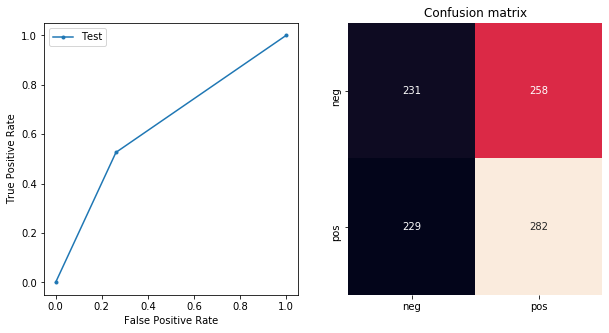

 
ROC AUC:	0.632
Accuracy:	0.630
		Micro	Macro	Weighted
Precision:	0.630	0.638	0.639
Recall:		0.630	0.632	0.630
F-measure:	0.630	0.627	0.626



In [76]:
eval_sklearn_visual(y_test, predicted_KN)

## **Логистическая регрессия**

In [27]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logreg_preds = logreg.predict(x_test)

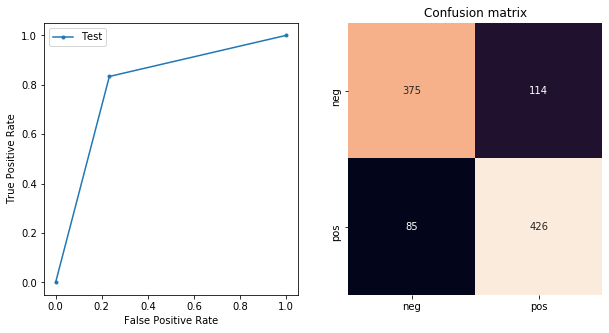

 
ROC AUC:	0.800
Accuracy:	0.801
		Micro	Macro	Weighted
Precision:	0.801	0.802	0.802
Recall:		0.801	0.800	0.801
F-measure:	0.801	0.800	0.801



In [70]:
eval_sklearn_visual(y_test, logreg_preds)

##**Метод опорных векторов**

